### I. Classify the Size_Categorie using SVM

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [15]:
forest_data=pd.read_csv('forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [16]:
unique_values_size = forest_data['size_category'].unique()
print(unique_values_size)


['small' 'large']


In [17]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
forest_data['month']=le.fit_transform(forest_data['month']) 


In [18]:
forest_data['size_category'] = forest_data['size_category'].astype('category')
forest_data['size_category'] = forest_data['size_category'].map({'large': 1,'small': 0})

In [19]:
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,7,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,1,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,1,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,1,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
forest_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [21]:
forest_data2=forest_data[['month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'size_category']]

In [22]:
forest_data2.describe()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5.758221,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,4.373275,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,6.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,11.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,11.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [23]:
forest_data2.head()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,7,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,7,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [24]:
forest_data2.isnull().sum()

month            0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
size_category    0
dtype: int64

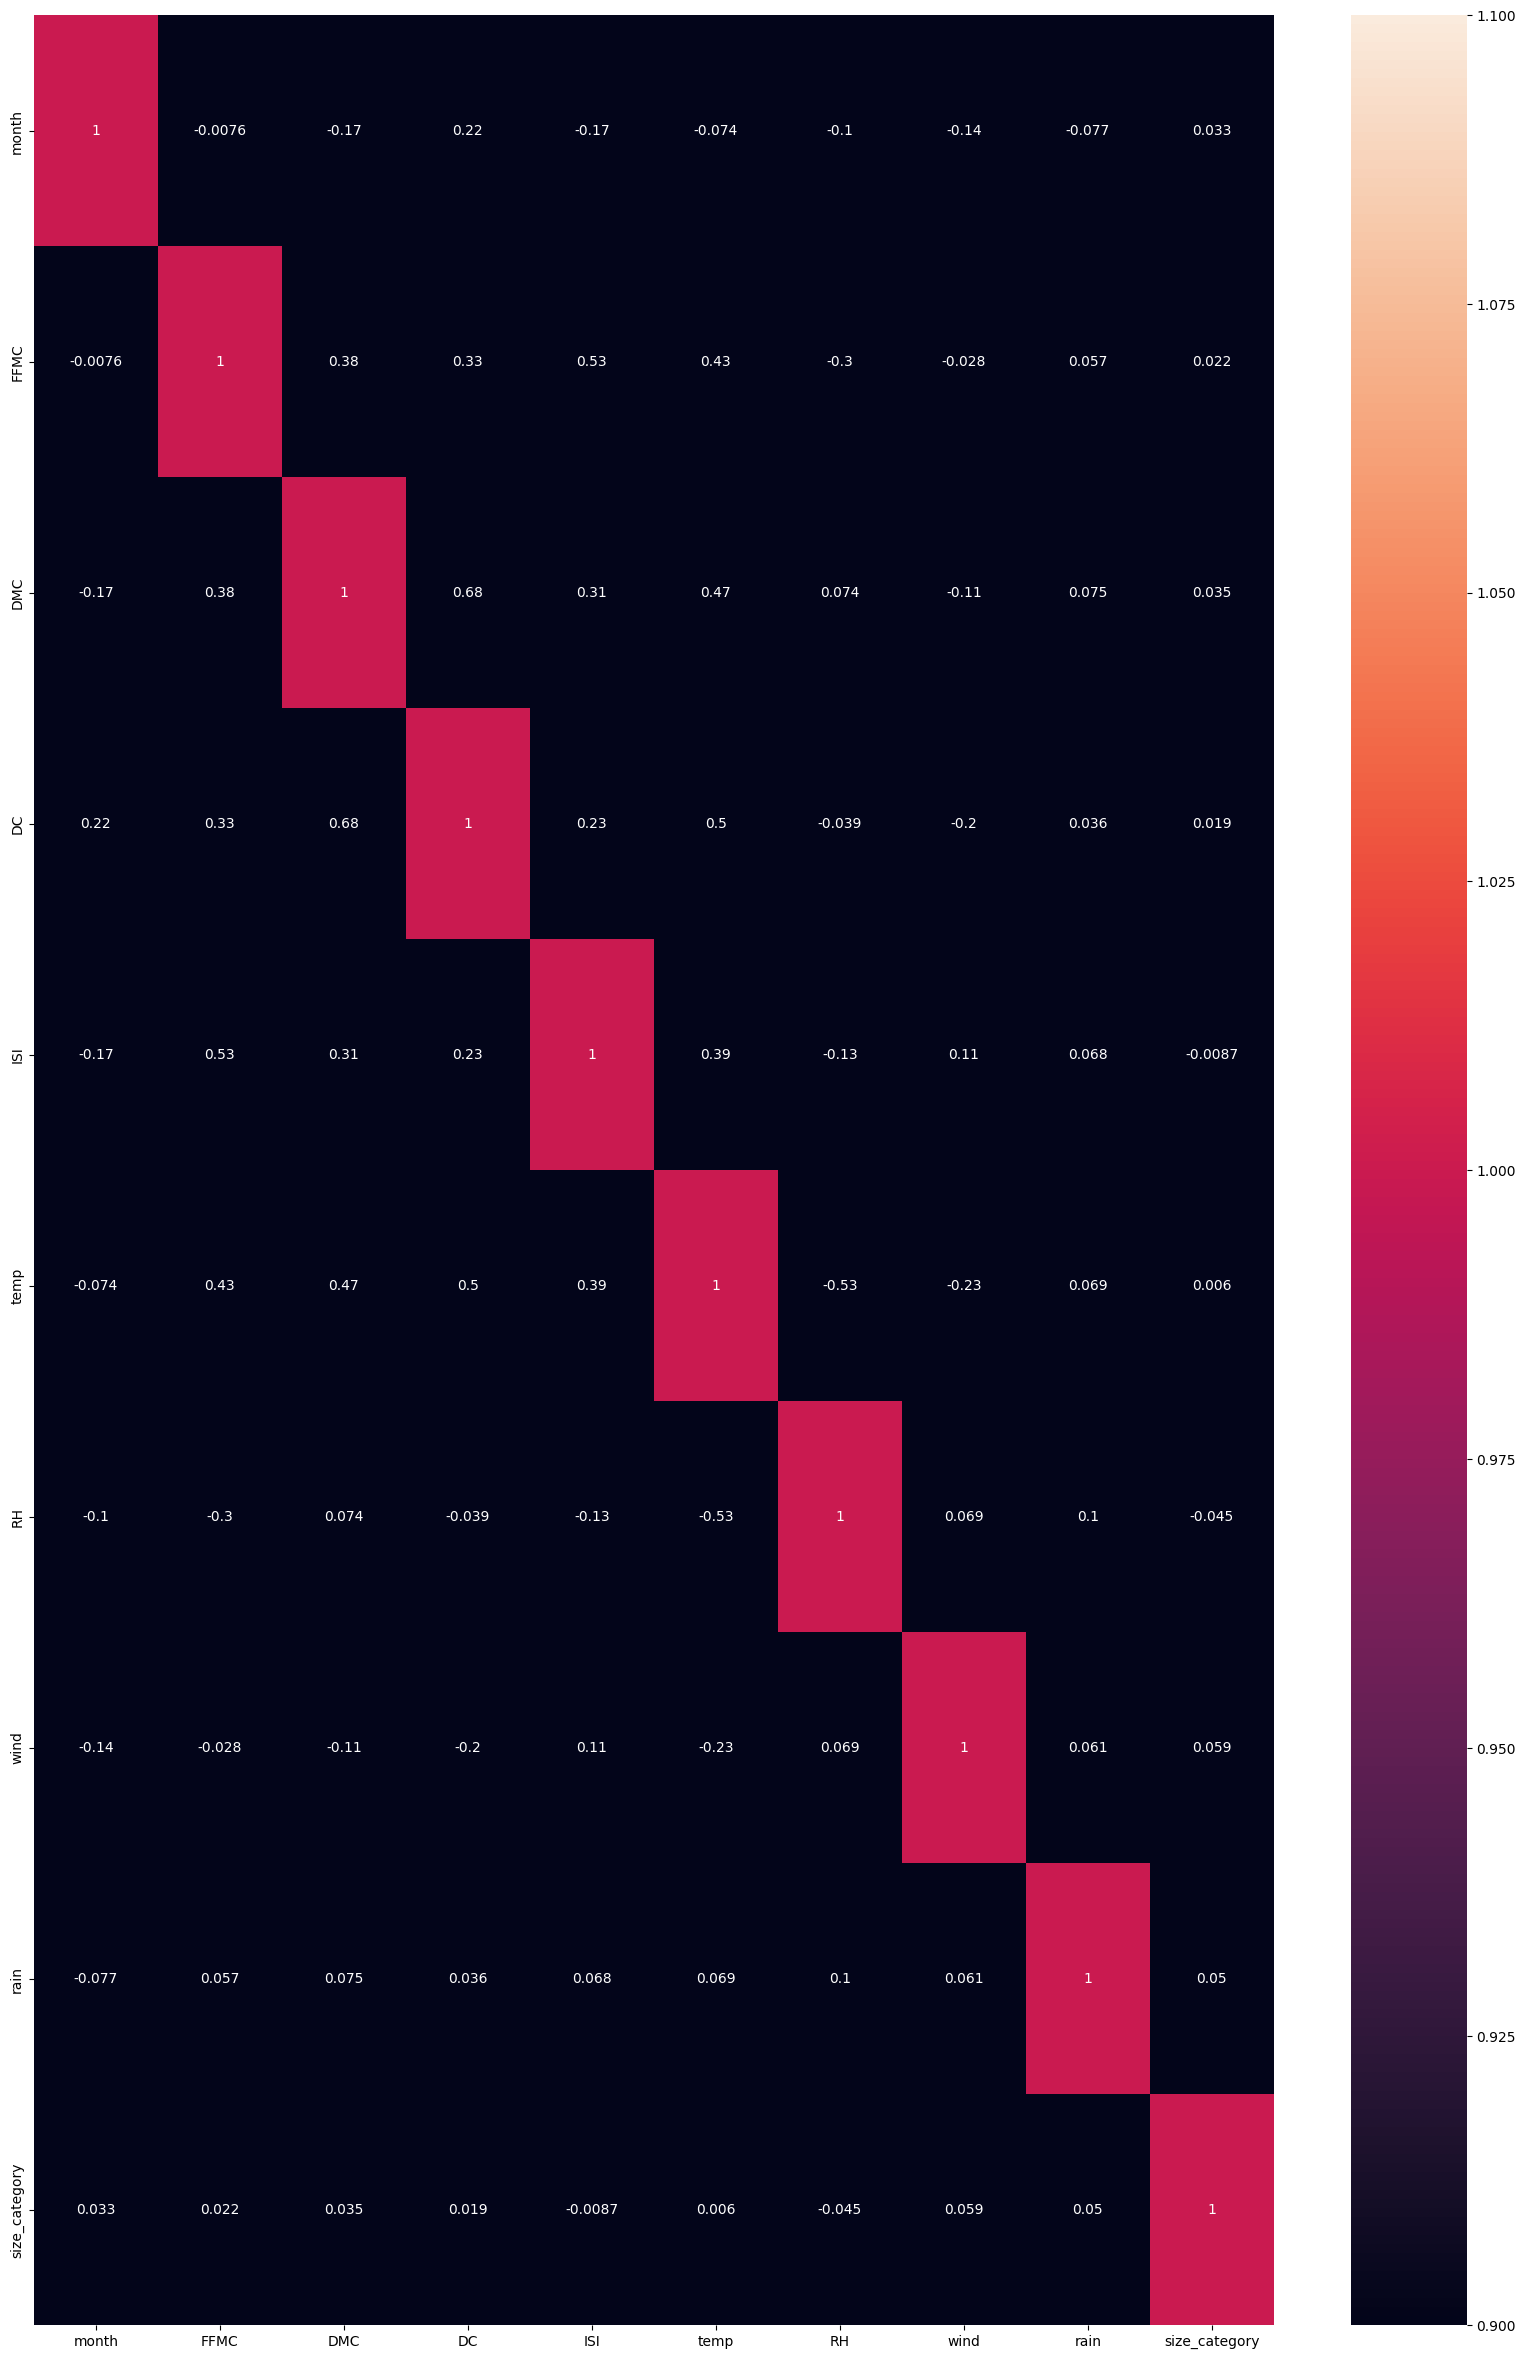

In [25]:
corr_forest=forest_data2.corr()
corr_forest 

import seaborn as sns 
import matplotlib.pyplot as plot 
plt.figure(figsize=(20,30))
sns.heatmap(corr_forest,vmin=1.0,vmax=1.0,annot=True)
plt.show()

In [26]:

forest_data2=forest_data[['month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'size_category']]

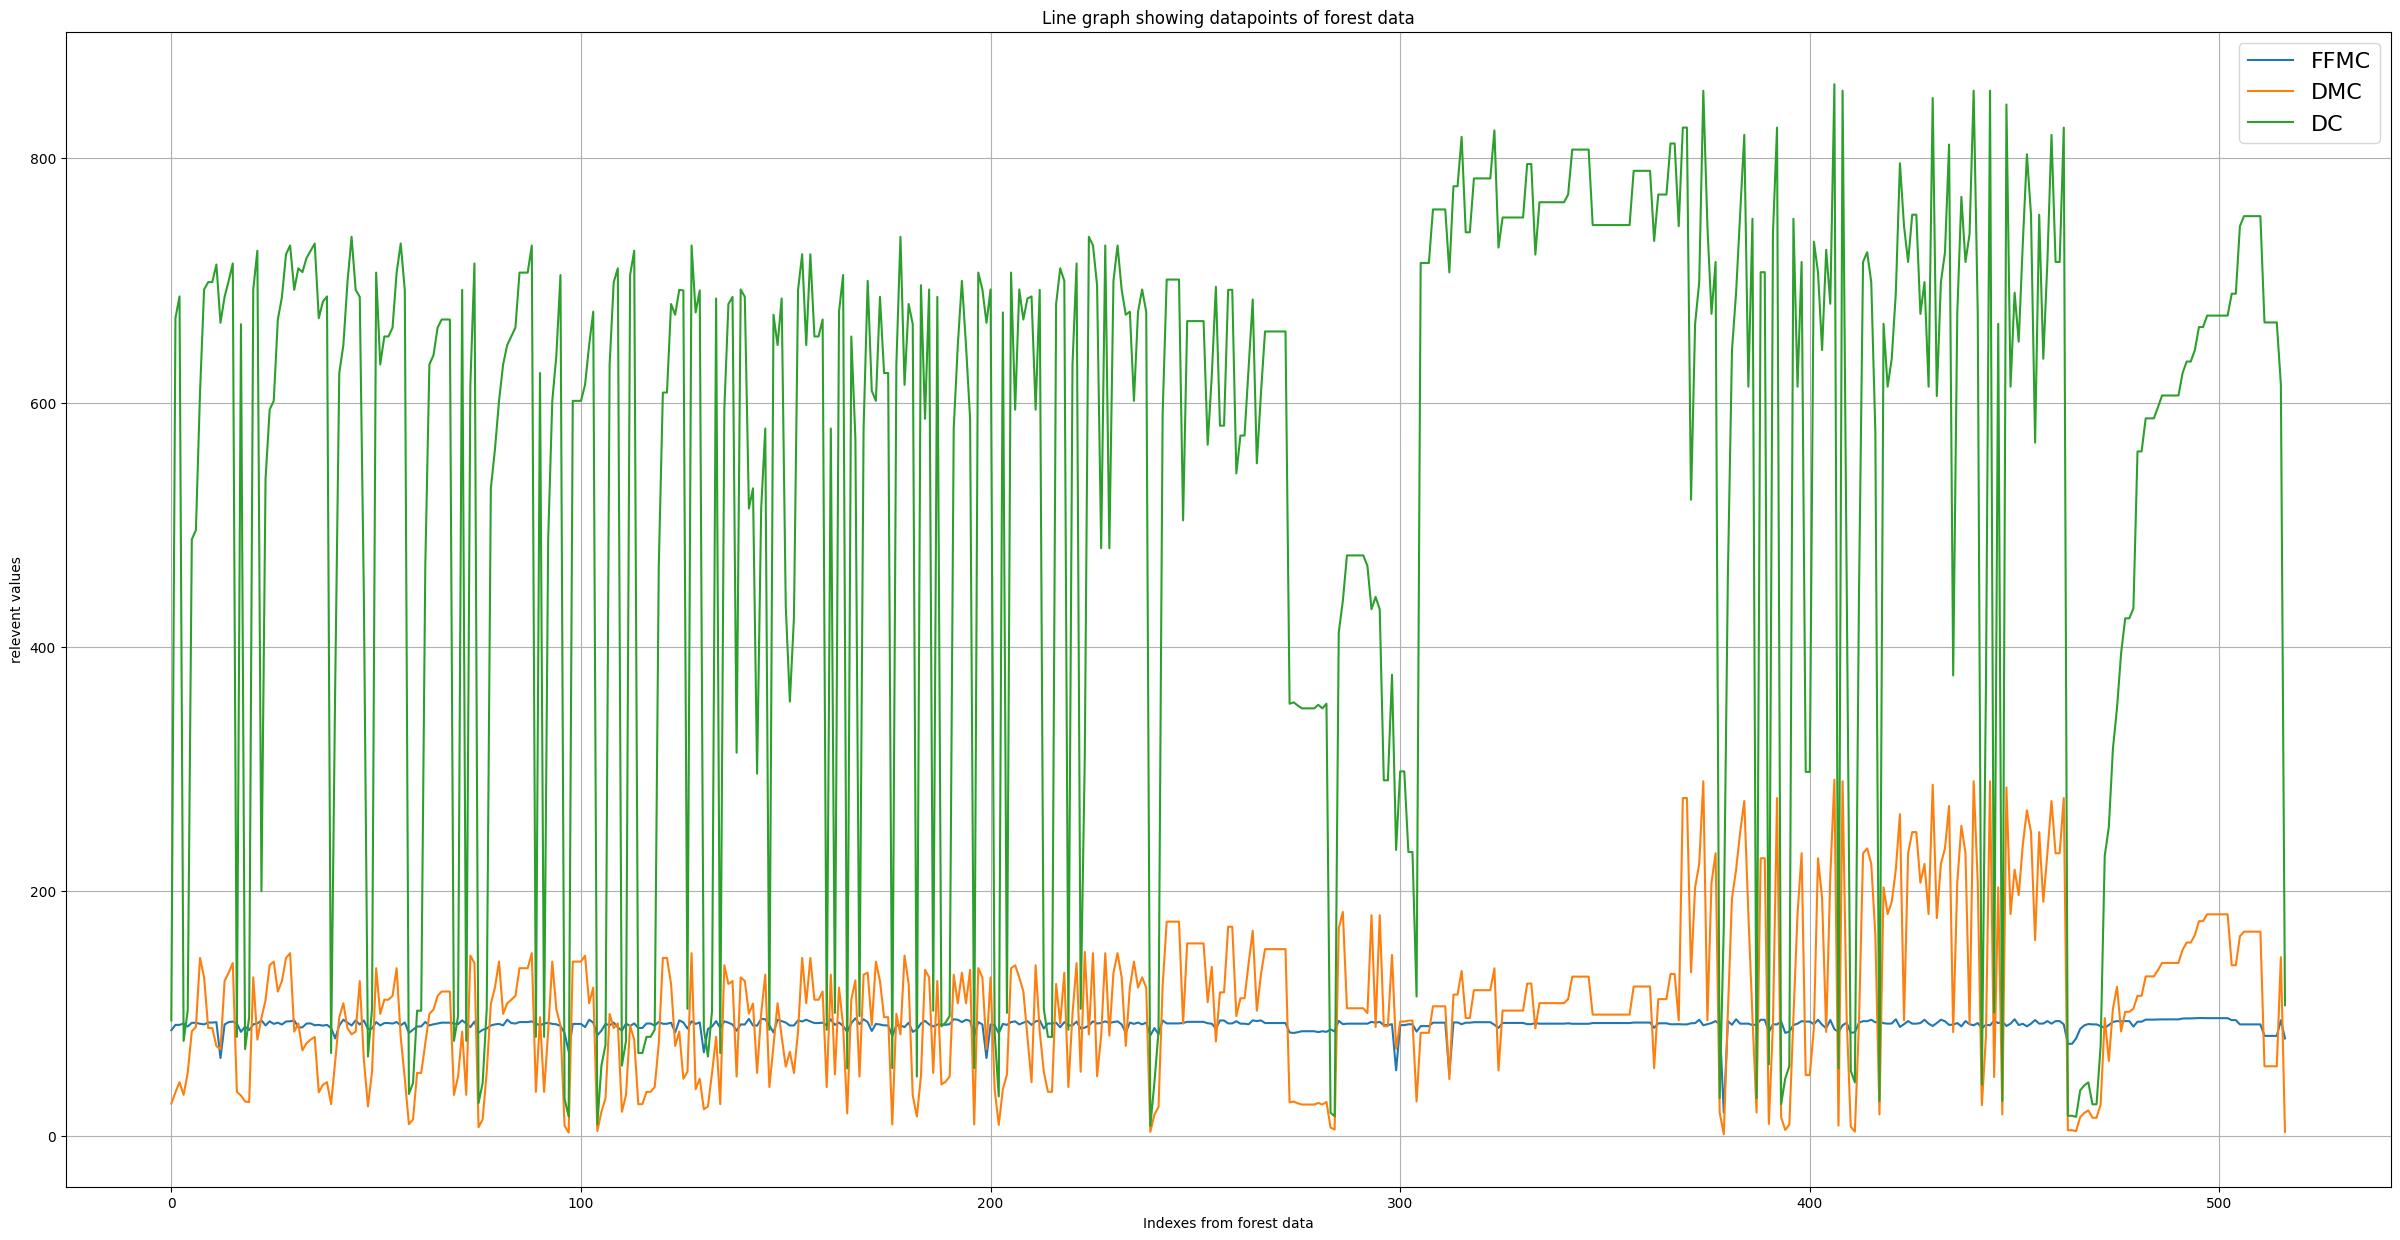

In [27]:
plt.figure(figsize=(30, 15))
table_data = ['FFMC', 'DMC', 'DC']
for column in table_data:
    plt.plot(forest_data2.index,forest_data2[column], label=column)


plt.xlabel('Indexes from forest data')
plt.ylabel('relevent values')
plt.title('Line graph showing datapoints of forest data')
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

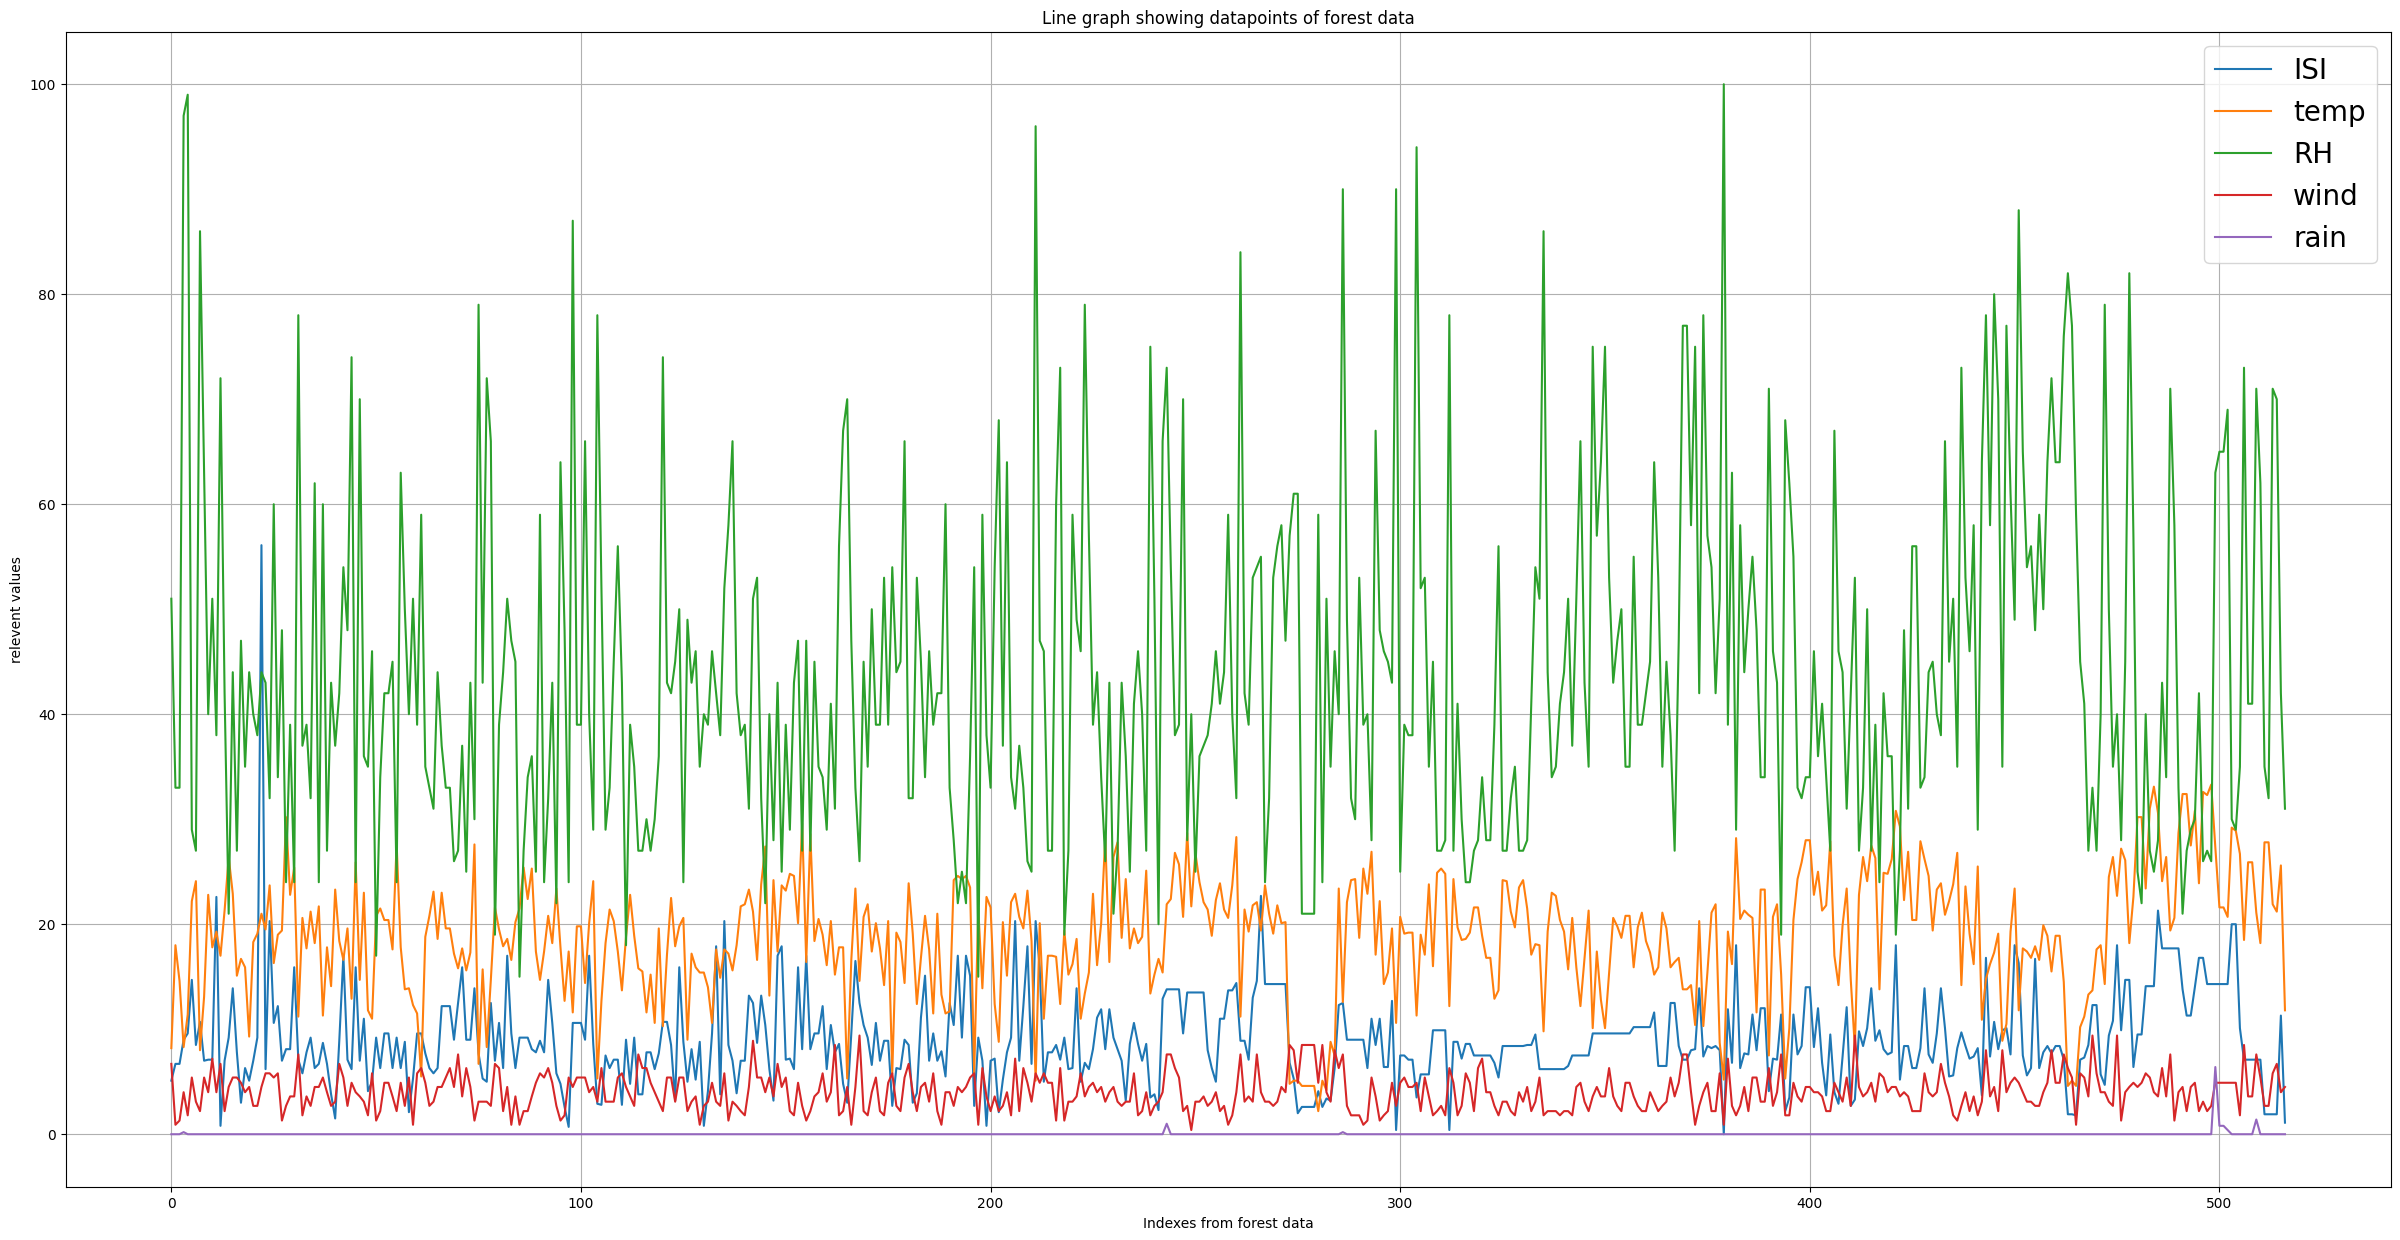

In [28]:
plt.figure(figsize=(30, 15))
table_data = ['ISI', 'temp', 'RH', 'wind','rain']
for column in table_data:
    plt.plot(forest_data2.index,forest_data2[column], label=column)


plt.xlabel('Indexes from forest data')
plt.ylabel('relevent values')
plt.title('Line graph showing datapoints of forest data')
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

In [29]:
x=forest_data[['month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain']]
y=forest_data[['size_category']]

In [30]:
x

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,7,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...
512,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [31]:
y

,size_category
0,0
1,0
2,0
3,0
4,0
...,...
512,1
513,1
514,1
515,0


In [32]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(413, 9)
(413, 1)
(104, 9)
(104, 1)


In [34]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(x_train) 
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
print(x_train)

[[ 1.16921816  0.40362609  0.32121645 ... -1.22258585  0.02831261
  -0.11229184]
 [ 1.16921816  0.65145087 -0.4225262  ...  0.16596603  0.55450245
  -0.11229184]
 [ 1.16921816  0.26201192 -0.3824073  ...  0.60777799 -0.49787724
  -0.11229184]
 ...
 [ 1.16921816  0.38592432  0.10056251 ... -0.6545419   1.89920984
  -0.11229184]
 [ 0.94047013  0.35052077 -1.01813753 ... -1.28570184  0.84683015
  -0.11229184]
 [-1.11826218  0.54524025 -0.15866729 ...  0.60777799  2.13307199
  -0.11229184]]


In [36]:
from sklearn.svm import SVC 

svc_model=SVC(kernel='rbf',C=20,gamma=0.1)
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(list(y_pred))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
svc_model.score(x_train,y_train)

0.7966101694915254

In [38]:
from sklearn.metrics import confusion_matrix, classification_report 

y_pred2=svc_model.predict(x_train)


confusion_matrix(y_train,y_pred2)

print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       303
           1       0.91      0.26      0.41       110

    accuracy                           0.80       413
   macro avg       0.85      0.63      0.64       413
weighted avg       0.82      0.80      0.75       413



### Changes as per suggestions

Build transformational models by applying transformational models like log, square, sqrt and calculate those rmse values.

In [50]:
forest_data=pd.read_csv('forestfires.csv')

In [51]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
forest_data['month']=le.fit_transform(forest_data['month']) 

In [52]:
forest_data['size_category'] = forest_data['size_category'].astype('category')
forest_data['size_category'] = forest_data['size_category'].map({'large': 1,'small': 0})

In [53]:
x=forest_data[['month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain']]
y=forest_data[['size_category']]

In [54]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Linear Kernel

In [69]:
# Linear kernal
from sklearn.svm import SVC 

linearsvm_forestdata=SVC(kernel='linear')
linearsvm_forestdata.fit(x_train,y_train)
y_pred_linear=linearsvm_forestdata.predict(x_test)
print("Linear Kernel:")



c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear Kernel:


In [71]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 


accuracy = accuracy_score(y_test, y_pred_linear)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7307692307692307
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80        76
           1       0.11      0.04      0.05        28

    accuracy                           0.66       104
   macro avg       0.41      0.47      0.42       104
weighted avg       0.55      0.66      0.60       104



Poly kernel

In [72]:
# poly kernal

polysvm_forestdata=SVC(kernel='poly', degree=2)
polysvm_forestdata.fit(x_train,y_train)
y_pred_poly= polysvm_forestdata.predict(x_test)
print("Poly Kernel:")


Poly Kernel:


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:

accuracy = accuracy_score(y_test, y_pred_poly)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_poly))

Accuracy: 0.7307692307692307
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80        76
           1       0.11      0.04      0.05        28

    accuracy                           0.66       104
   macro avg       0.41      0.47      0.42       104
weighted avg       0.55      0.66      0.60       104



RBF kernel

In [74]:
rbfsvm_forestdata=SVC(kernel='rbf')
rbfsvm_forestdata.fit(x_train, y_train)
y_pred_rbf=rbfsvm_forestdata.predict(x_test)
print("rbf kernel:")

rbf kernel:


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
accuracy=accuracy_score(y_test, y_pred_rbf)
print("accuracy:", accuracy)
print("Classification Report:", classification_report(y_test, y_pred_rbf))

accuracy: 0.7307692307692307
Classification Report:               precision    recall  f1-score   support

           0       0.73      1.00      0.84        76
           1       0.00      0.00      0.00        28

    accuracy                           0.73       104
   macro avg       0.37      0.50      0.42       104
weighted avg       0.53      0.73      0.62       104



c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Sigmoid kernel

In [77]:
svm_sigmoid_forestdata = SVC(kernel='sigmoid')
svm_sigmoid_forestdata.fit(x_train, y_train)
y_pred_sigmoid = svm_sigmoid_forestdata.predict(x_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
accuracy=accuracy_score(y_test, y_pred_sigmoid)
print("accuracy:", accuracy)
print("Classification Report:", classification_report(y_test, y_pred_sigmoid))

accuracy: 0.6730769230769231
Classification Report:               precision    recall  f1-score   support

           0       0.74      0.86      0.79        76
           1       0.31      0.18      0.23        28

    accuracy                           0.67       104
   macro avg       0.53      0.52      0.51       104
weighted avg       0.62      0.67      0.64       104



-----------------------------------------------------------------------------------------

### II. Prepare a classification model using SVM for salary data 

In [133]:
train_salary_data=pd.read_csv('SalaryData_Train(1).csv')
test_salary_data=pd.read_csv('SalaryData_Test(1).csv')

In [134]:
train_salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [135]:
uniq_val=train_salary_data['Salary'].unique()
print(uniq_val)

[' <=50K' ' >50K']


In [136]:
test_salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [137]:
print(train_salary_data.shape)
print(test_salary_data.shape)

(30161, 14)
(15060, 14)


In [138]:
train_salary_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [139]:
test_salary_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [140]:
train_salary_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [141]:
test_salary_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


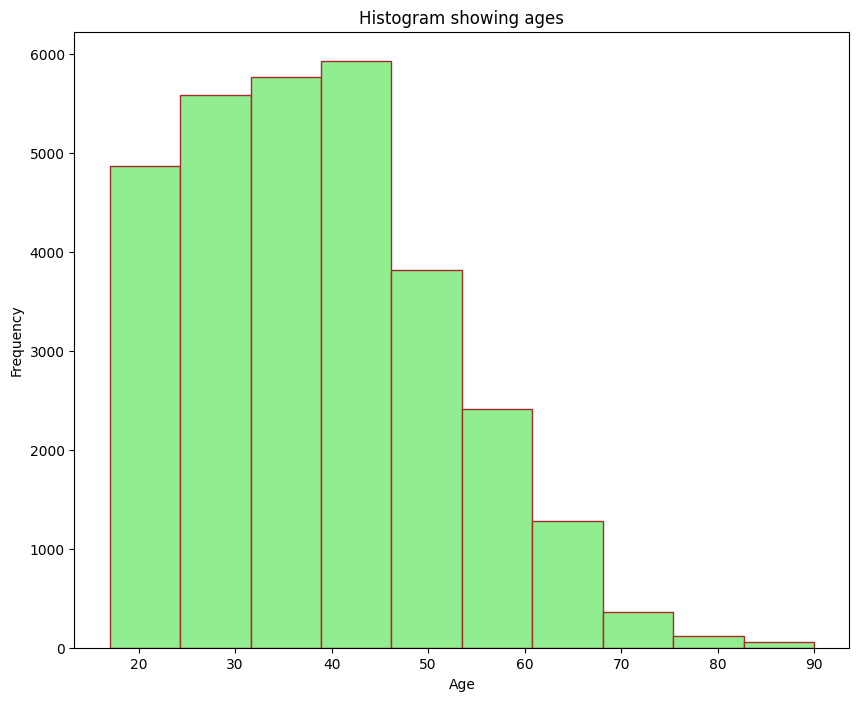

In [142]:
# histogram showing ages

ages=train_salary_data['age']

plt.figure(figsize=(10,8))
plt.hist(ages, bins=10, color='lightgreen',edgecolor='brown')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram showing ages')
plt.show()

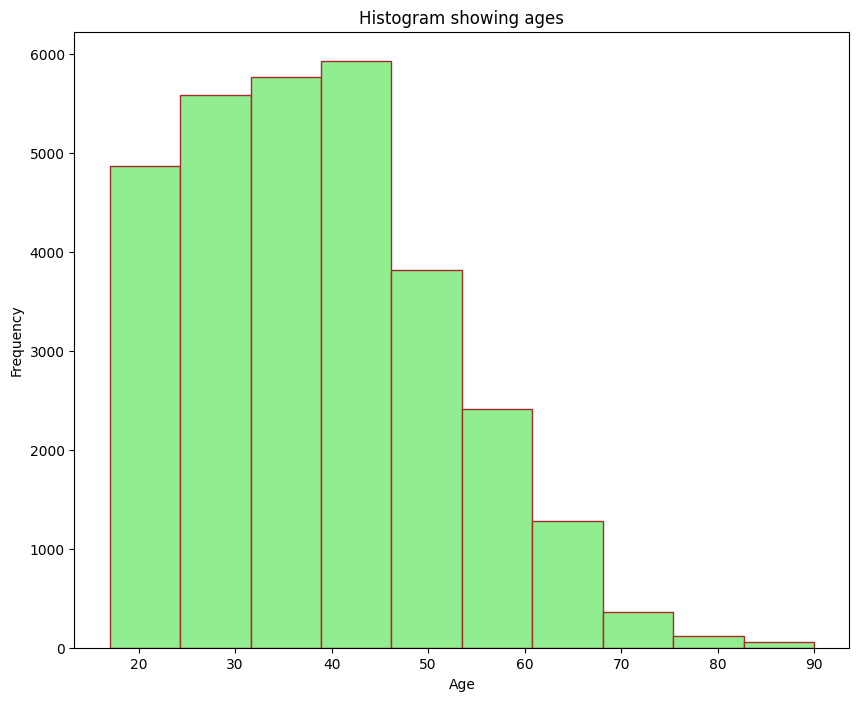

In [143]:
ages=train_salary_data['age']

plt.figure(figsize=(10,8))
plt.hist(ages, bins=10, color='lightgreen',edgecolor='brown')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram showing ages')
plt.show()

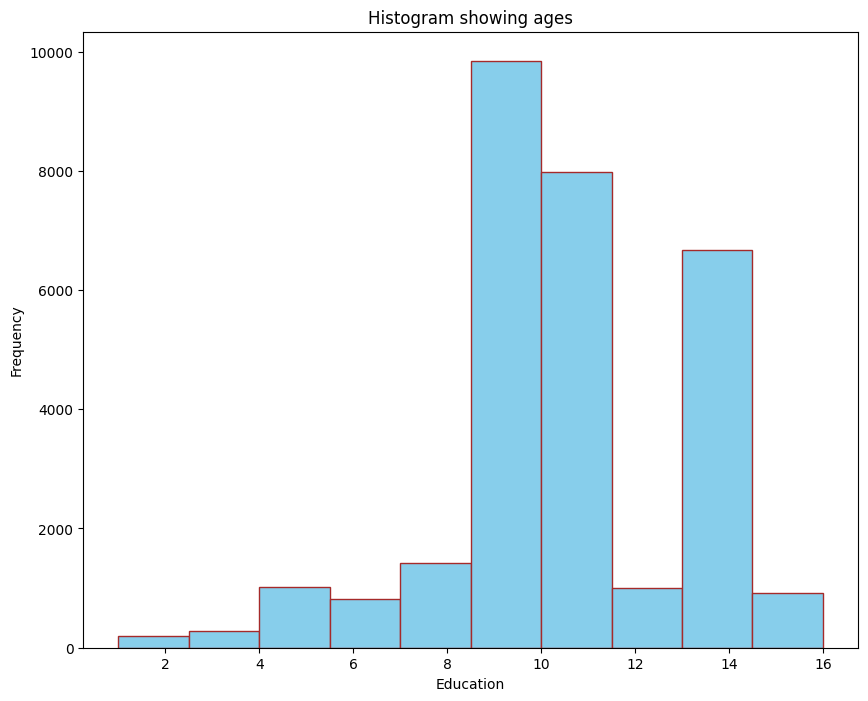

In [144]:
ages=train_salary_data['educationno']

plt.figure(figsize=(10,8))
plt.hist(ages, bins=10, color='skyblue',edgecolor='brown')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Histogram showing ages')
plt.show()

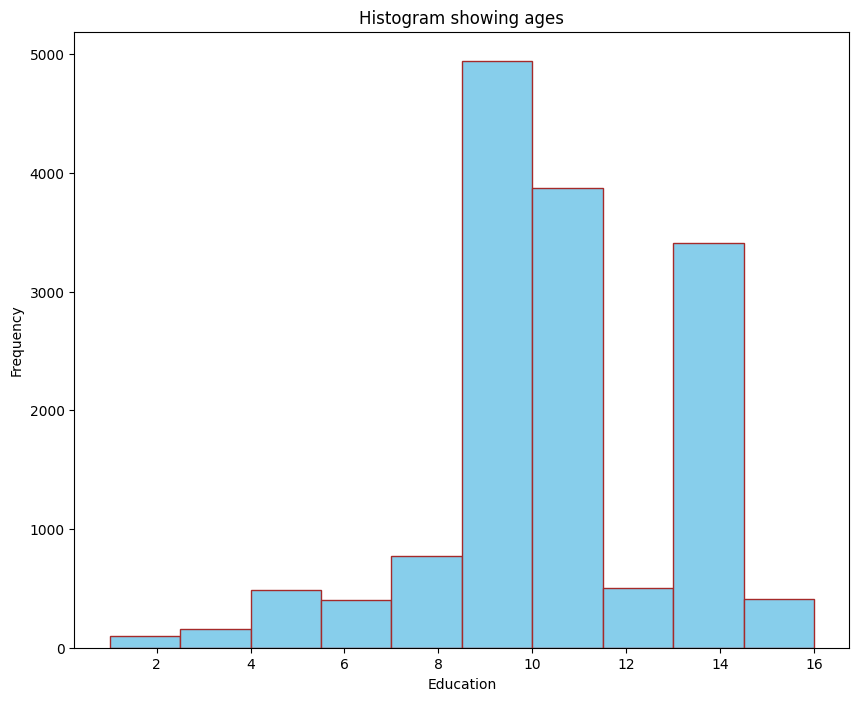

In [145]:
ages=test_salary_data['educationno']

plt.figure(figsize=(10,8))
plt.hist(ages, bins=10, color='skyblue',edgecolor='brown')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Histogram showing ages')
plt.show()

In [146]:
test_salary_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [147]:
train_salary_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [148]:
train_salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [149]:
from sklearn.preprocessing import LabelEncoder 
colname=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

le=LabelEncoder()

for x in colname: 
    train_salary_data[x]=le.fit_transform(train_salary_data[x])

In [150]:
train_salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [151]:
test_salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [152]:
colname=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

le=LabelEncoder()

for x in colname: 
    test_salary_data[x]=le.fit_transform(test_salary_data[x])

In [153]:
test_salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [154]:
x_train=train_salary_data.values[:,0:-1]
y_train=train_salary_data.values[:,-1] 
y_train=y_train.astype(int)

In [155]:
x_train.shape

(30161, 13)

In [156]:
x_test=test_salary_data.values[:,0:-1]

In [157]:
x_test.shape

(15060, 13)

In [158]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)

x_test=scaler.transform(x_test)

In [159]:
print(x_train)

[[ 0.04277892  2.93594688 -0.34982703 ... -0.21850808 -0.07773541
   0.26635842]
 [ 0.88026081  1.88764517 -0.34982703 ... -0.21850808 -2.33149486
   0.26635842]
 [-0.0333558  -0.20895825  0.1748048  ... -0.21850808 -0.07773541
   0.26635842]
 ...
 [ 1.48933854 -0.20895825  0.1748048  ... -0.21850808 -0.07773541
   0.26635842]
 [-1.25151126 -0.20895825  0.1748048  ... -0.21850808 -1.74718685
   0.26635842]
 [ 1.03253024  0.83934346  0.1748048  ... -0.21850808 -0.07773541
   0.26635842]]


In [160]:
from sklearn.svm import SVC 
svc_model=SVC(kernel='rbf', C=20,gamma=0.1)
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(list(y_pred))

[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

In [110]:
svc_model.score(x_train,y_train)


0.8730479758628693

In [111]:
from sklearn.metrics import confusion_matrix,  classification_report 

y_pred=svc_model.predict(x_train)
confusion_matrix(y_train,y_pred) 

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22653
           1       0.81      0.64      0.72      7508

    accuracy                           0.87     30161
   macro avg       0.85      0.80      0.82     30161
weighted avg       0.87      0.87      0.87     30161



In [112]:

test_data=pd.read_csv(r'SalaryData_Test(1).csv')
test_data["y_predictions"]=y_pred[:len(test_data)]
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,y_predictions
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0


In [113]:
test_data["y_predictions"]=test_data["y_predictions"].map({1:"Eligible",0:"Not Eligible"})

In [114]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,y_predictions
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Not Eligible
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Not Eligible
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Not Eligible
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Not Eligible
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,Not Eligible


In [115]:
unique_values_y_pred = test_data['y_predictions'].unique()
print(unique_values_y_pred)

['Not Eligible' 'Eligible']


In [116]:
test_data.head(50)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,y_predictions
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Not Eligible
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Not Eligible
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Not Eligible
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Not Eligible
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,Not Eligible
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,Eligible
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,Not Eligible
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,Not Eligible
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K,Eligible
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K,Eligible


---

### Changes as per suggestions

Build transformational models by applying transformational models like log, square, sqrt and calculate those rmse values.

In [162]:
train_salary_data=pd.read_csv('SalaryData_Train(1).csv')
test_salary_data=pd.read_csv('SalaryData_Test(1).csv')

In [163]:
train_salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [164]:
test_salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [165]:
from sklearn.preprocessing import LabelEncoder 
colname=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

le=LabelEncoder()

for x in colname: 
    train_salary_data[x]=le.fit_transform(train_salary_data[x])

In [166]:
train_salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [167]:
colname=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

le=LabelEncoder()

for x in colname: 
    test_salary_data[x]=le.fit_transform(test_salary_data[x])

In [168]:
test_salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [169]:
x_train=train_salary_data.values[:,0:-1]
y_train=train_salary_data.values[:,-1] 
y_train=y_train.astype(int)

In [170]:
x_train.shape

(30161, 13)

In [171]:
x_test=test_salary_data.values[:,0:-1]

In [172]:
x_test.shape

(15060, 13)

In [173]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)

x_test=scaler.transform(x_test)

In [174]:
print(x_train)

[[ 0.04277892  2.93594688 -0.34982703 ... -0.21850808 -0.07773541
   0.26635842]
 [ 0.88026081  1.88764517 -0.34982703 ... -0.21850808 -2.33149486
   0.26635842]
 [-0.0333558  -0.20895825  0.1748048  ... -0.21850808 -0.07773541
   0.26635842]
 ...
 [ 1.48933854 -0.20895825  0.1748048  ... -0.21850808 -0.07773541
   0.26635842]
 [-1.25151126 -0.20895825  0.1748048  ... -0.21850808 -1.74718685
   0.26635842]
 [ 1.03253024  0.83934346  0.1748048  ... -0.21850808 -0.07773541
   0.26635842]]


In [176]:
from sklearn.svm import SVC 
svc_model=SVC(kernel='rbf', C=20,gamma=0.1)
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(list(y_pred))

[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

In [177]:
svc_model.score(x_train,y_train)


0.8730479758628693

### Linear Kernel

In [180]:
from sklearn.svm import SVC 

linearsvm_forestdata=SVC(kernel='linear')
linearsvm_forestdata.fit(x_train,y_train)
y_pred_linear=linearsvm_forestdata.predict(x_test)
print(list(y_pred_linear))


[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [181]:
svc_model.score(x_train,y_train)


0.8730479758628693

In [182]:
from sklearn.metrics import confusion_matrix,  classification_report 

y_pred=svc_model.predict(x_train)
confusion_matrix(y_train,y_pred) 

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22653
           1       0.81      0.64      0.72      7508

    accuracy                           0.87     30161
   macro avg       0.85      0.80      0.82     30161
weighted avg       0.87      0.87      0.87     30161



### rbf Kernel

In [183]:
from sklearn.svm import SVC 
svc_model=SVC(kernel='rbf', C=20,gamma=0.1)
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(list(y_pred))

[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

In [184]:
svc_model.score(x_train,y_train)


0.8730479758628693

In [185]:
from sklearn.metrics import confusion_matrix,  classification_report 

y_pred=svc_model.predict(x_train)
confusion_matrix(y_train,y_pred) 

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22653
           1       0.81      0.64      0.72      7508

    accuracy                           0.87     30161
   macro avg       0.85      0.80      0.82     30161
weighted avg       0.87      0.87      0.87     30161



### Poly kernel

In [186]:
from sklearn.svm import SVC 
svc_model=SVC(kernel='poly')
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(list(y_pred))

[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

In [187]:
svc_model.score(x_train,y_train)


0.8432412718411193

In [188]:
from sklearn.metrics import confusion_matrix,  classification_report 

y_pred=svc_model.predict(x_train)
confusion_matrix(y_train,y_pred) 

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22653
           1       0.77      0.53      0.63      7508

    accuracy                           0.84     30161
   macro avg       0.81      0.74      0.76     30161
weighted avg       0.84      0.84      0.83     30161



### Sigmoid kernel

In [192]:
from sklearn.svm import SVC 
svc_model=SVC(kernel='sigmoid')
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(list(y_pred))

[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 

In [193]:
svc_model.score(x_train,y_train)


0.7548821325552866

In [194]:
from sklearn.metrics import confusion_matrix,  classification_report 

y_pred=svc_model.predict(x_train)
confusion_matrix(y_train,y_pred) 

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     22653
           1       0.51      0.50      0.51      7508

    accuracy                           0.75     30161
   macro avg       0.67      0.67      0.67     30161
weighted avg       0.75      0.75      0.75     30161

